## First things first! Linear regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
parent = os.path.abspath(os.path.join(cwd,'..'))
print(parent)
#plt.style.use(parent+'\plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

/Users/meghanadkayanattil/Documents/GitHub/Data_Science_Python_notebooks


In [2]:
dataset = pd.read_csv('clean_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   incentive              1197 non-null   int64  
 2   no_of_workers          1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 56.2 KB


## Green - kinda good, Red - kinda bad

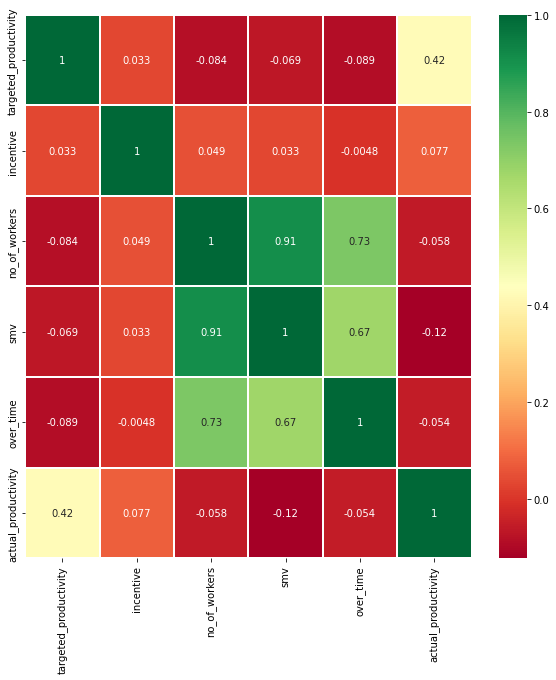

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True,
            linewidth=.2, cmap="RdYlGn")
plt.show();

Doing a simple pair plot with possible feature which can have a correlation with productivity

There seems to be no visible cotrrelation between the features. This will result in poor peformance of a simple linear regression model (there is almost no incentive, yeesh!)

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('actual_productivity')
test_labels = test_features.pop('actual_productivity')

# Making sure that the data is in correct shape and format
print(f'Train features shape = {train_features.shape}')
print(f'Test features shape = {test_features.shape}')
print(f'Train labels shape = {train_labels.shape}')
print(f'Test labels shape = {test_labels.shape}')

Train features shape = (958, 5)
Test features shape = (239, 5)
Train labels shape = (958,)
Test labels shape = (239,)


In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
# Normalizing the training data
scalar = StandardScaler()
X_train = scalar.fit_transform(train_features)

In [7]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_train, train_labels)
train_pred = sgdr.predict(X_train)

print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(f'Score = {sgdr.score(X_train, train_labels)}')
print(f'RMSE = {mean_squared_error(train_labels, train_pred ,squared = False)}')

SGDRegressor(max_iter=10000)
Number of iterations completed: 7, Number of weight updates: 6707.0
Score = 0.208475012593056
RMSE = 0.15490084181748365


As expected the simple linear regressor is performing very poorly and I do not see any potential improvement possible with polynomial regression as well. Time to move on to Random forest regressor. 

In this notebook we will use keras to build our neural networks

## Building the neural network model

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization

In [10]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential

In [11]:
model = Sequential(
    [
        Dense(80, activation = 'relu'),
        Dense(60, activation = 'relu'),
        Dense(40, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ], name = "Worker_productivity" 
)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-09 10:27:36.660727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-09 10:27:36.661200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [13]:
model.fit(X_train, train_labels, epochs = 1000, verbose=0)

2022-09-09 10:28:28.963556: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-09 10:28:29.397367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
train_pred = model.predict(X_train)
print(f'RMSE = {mean_squared_error(train_labels, train_pred ,squared = False)}')

30/30 [==============================] - 0s 2ms/step
RMSE = 0.09654021633024919


2022-09-09 10:31:05.031137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'Predicted')

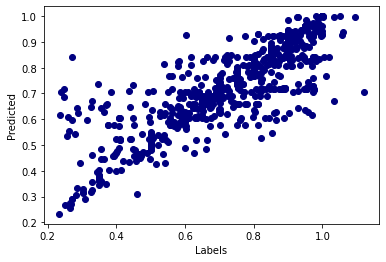

In [15]:
fig4, ax4 = plt.subplots()
ax4.scatter(train_labels, train_pred)
ax4.set_xlabel('Labels')
ax4.set_ylabel('Predicted')